# Visualisation example

This is a quick notebook to demonstrate the 2D descriptors computed by RDKit for ligands for two targets: trypsin and thrombin. We compare the distribution of binding affinity data for both targets, as well as the overlap of the molecules in the data sets. We examine the distribution of several physically-meaningful descriptors and decide how to handle outliers.

In [7]:
import json

import pandas as pd
import seaborn as sns 

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
trypsin_data = pd.read_csv('./chembl_data/try1_extracted_chembl_data.csv', index_col=0)
thrombin_data = pd.read_csv('./chembl_data/thrb_extracted_chembl_data.csv', index_col=0)

with open('./chembl_data/try1_ligands_descriptors.json') as f:
    trypsin_features = json.load(f)
  
with open('./chembl_data/thrb_ligands_descriptors.json') as f:
    thrombin_features = json.load(f)

trypsin_features = pd.DataFrame.from_dict(trypsin_features, orient='index')
thrombin_features = pd.DataFrame.from_dict(thrombin_features, orient='index')

Due to similarities in their active site, trypsin and thrombin share many ligands. Let's visualse the proportion of ligands in our data set that bind to both targets.

Text(0, 0.5, 'Number of ligands')

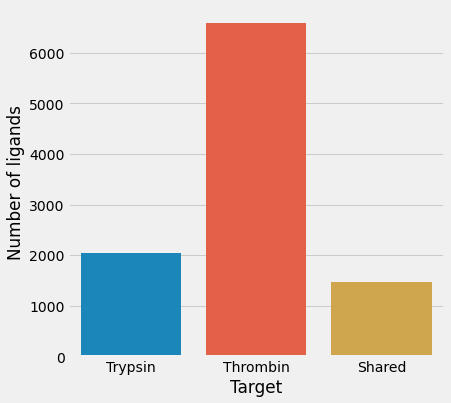

In [9]:
n_trypsin = len(trypsin_data.index)
n_thrombin = len(thrombin_data.index)
n_shared = len(trypsin_data.index.intersection(thrombin_data.index))

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(['Trypsin', 'Thrombin', 'Shared'], [n_trypsin, n_thrombin, n_shared], ax=ax)
ax.set_xlabel('Target')
ax.set_ylabel('Number of ligands')


Next, let's look at the distribution of the binding affinities for our ligands. pChEMBL is the negative base-10 logarithm of the binding constant, so a difference of one unit corresponds to an order of magnitude difference in binding energy. 

Text(0.5, 1.0, 'Thrombin')

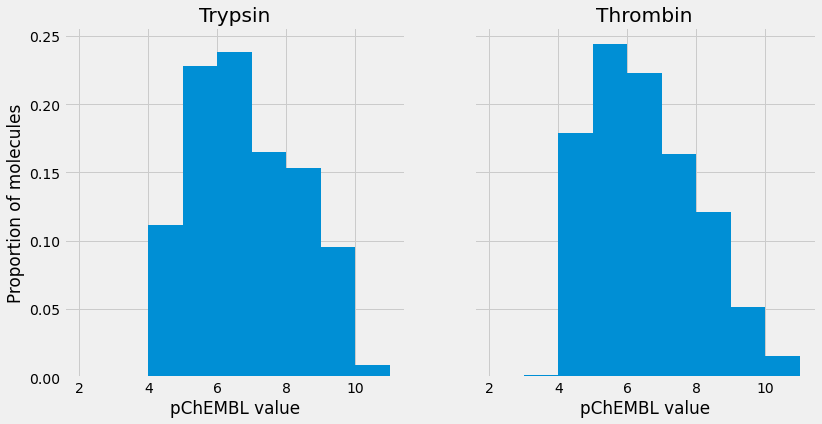

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

trypsin_data['pchembl_value'].hist(density=True, bins=range(2, 12), ax=ax1)
thrombin_data['pchembl_value'].hist(density=True, bins=range(2, 12), ax=ax2)

ax1.set_xlabel('pChEMBL value')
ax2.set_xlabel('pChEMBL value')

ax1.set_ylabel('Proportion of molecules')

ax1.set_title('Trypsin')
ax2.set_title('Thrombin')


Both datasets span a good range of values. Now let's look at some of the properties of the molecules. 

Lipinski's rule of five is a rule of thumb often used to guide drug discovery. It states that a compound that violates more than one of the following conditions is unlikely to be orally available in humans:

- No more than 5 hydrogen bond donors (the total number of nitrogen–hydrogen and oxygen–hydrogen bonds)
- No more than 10 hydrogen bond acceptors (all nitrogen or oxygen atoms)
- A molecular mass less than 500 daltons
- An octanol-water partition coefficient (log P) that does not exceed 5

For instance, let's look at the molecular weights of the molecules in our data set.

Text(0.5, 1.0, 'Thrombin')

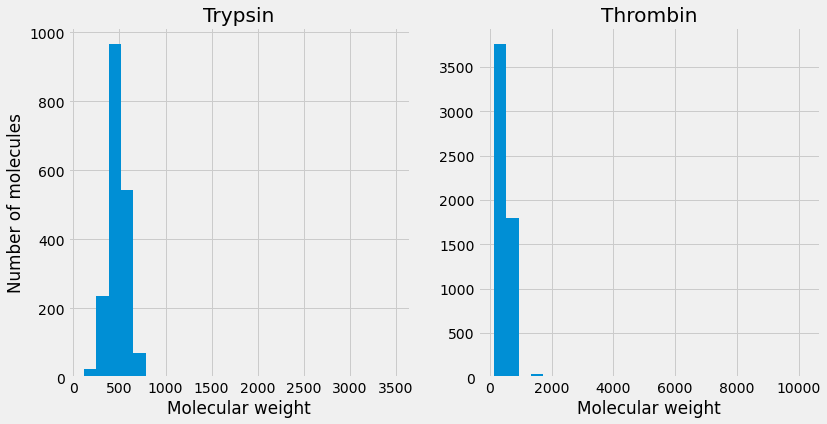

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

trypsin_features['MolWt'].hist(ax=ax1, bins=25)
thrombin_features['MolWt'].hist(ax=ax2, bins=25)

ax1.set_xlabel('Molecular weight')
ax2.set_xlabel('Molecular weight')

ax1.set_ylabel('Number of molecules')

ax1.set_title('Trypsin')
ax2.set_title('Thrombin')

Looks like we have some outliers with incredibly high molecular weight in our data! Let's be generous and restrict our data to molecules with a weight of less than 1000 Da.

In [98]:
len(trypsin_features[trypsin_features['MolWt'] > 1000]), len(thrombin_features[thrombin_features['MolWt'] > 1000])

(15, 78)

Text(0.5, 1.0, 'Thrombin')

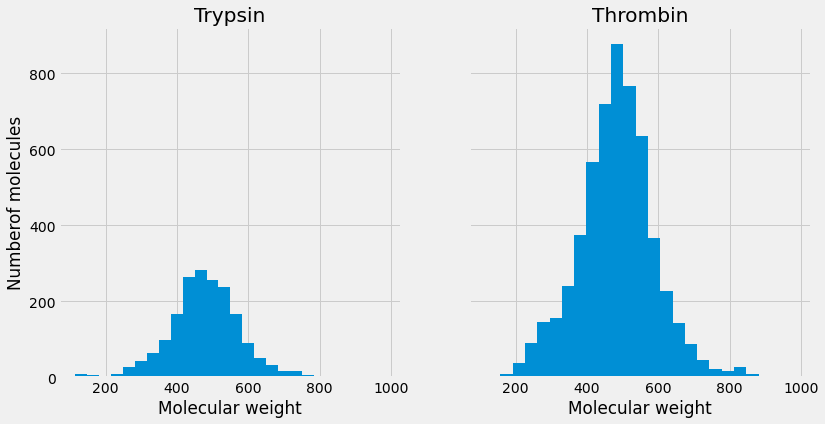

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

trypsin_features[trypsin_features['MolWt'] < 1000]['MolWt'].hist(ax=ax1, bins=25)
thrombin_features[thrombin_features['MolWt'] < 1000]['MolWt'].hist(ax=ax2, bins=25)

ax1.set_xlabel('Molecular weight')
ax2.set_xlabel('Molecular weight')

ax1.set_ylabel('Numberof molecules')

ax1.set_title('Trypsin')
ax2.set_title('Thrombin')

Similarly, we can check for outliers in other properties. For example, the water-octanol partition coefficient, log P. First, let's look at all of the data.

Text(0.5, 1.0, 'Thrombin')

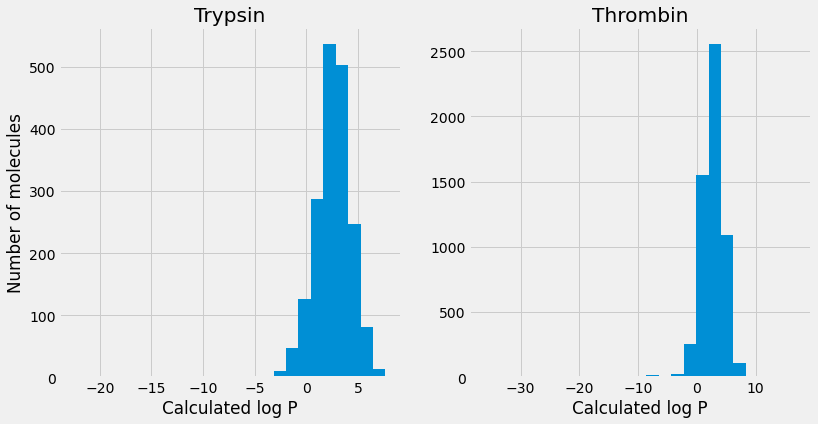

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

trypsin_features['MolLogP'].hist(ax=ax1, bins=25)
thrombin_features['MolLogP'].hist(ax=ax2, bins=25)

ax1.set_xlabel('Calculated log P')
ax2.set_xlabel('Calculated log P')

ax1.set_ylabel('Number of molecules')

ax1.set_title('Trypsin')
ax2.set_title('Thrombin')

Looks like we have some outliers with large (negative) log P. First, let's drop the molecular weight outliers:

Text(0.5, 1.0, 'Thrombin')

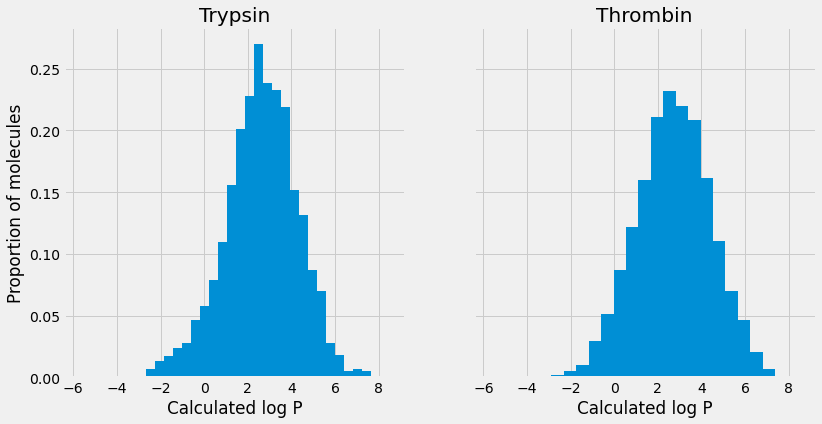

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

trypsin_features[trypsin_features['MolWt'] < 1000]['MolLogP'].hist(density=True, ax=ax1, bins=25)
thrombin_features[thrombin_features['MolWt'] < 1000]['MolLogP'].hist(density=True, ax=ax2, bins=25)

ax1.set_xlabel('Calculated log P')
ax2.set_xlabel('Calculated log P')

ax1.set_ylabel('Proportion of molecules')

ax1.set_title('Trypsin')
ax2.set_title('Thrombin')

Or the flexibility of the molecule, captured by the number of rotatable bonds.

Text(0.5, 1.0, 'Thrombin')

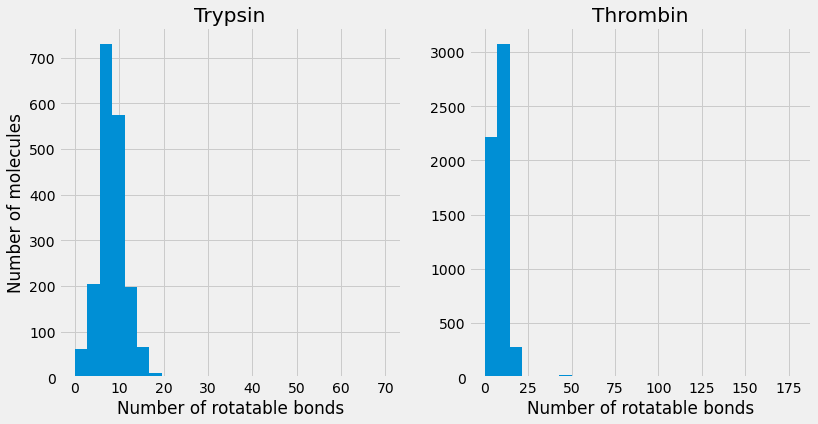

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

trypsin_features['NumRotatableBonds'].hist(ax=ax1, bins=25)
thrombin_features['NumRotatableBonds'].hist(ax=ax2, bins=25)

ax1.set_xlabel('Number of rotatable bonds')
ax2.set_xlabel('Number of rotatable bonds')

ax1.set_ylabel('Number of molecules')

ax1.set_title('Trypsin')
ax2.set_title('Thrombin')

Text(0.5, 1.0, 'Thrombin')

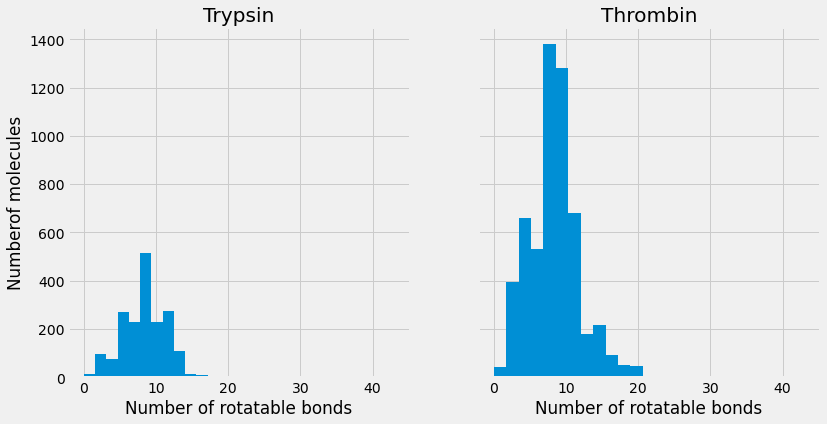

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

trypsin_features[trypsin_features['MolWt'] < 1000]['NumRotatableBonds'].hist(ax=ax1, bins=25)
thrombin_features[thrombin_features['MolWt'] < 1000]['NumRotatableBonds'].hist(ax=ax2, bins=25)

ax1.set_xlabel('Number of rotatable bonds')
ax2.set_xlabel('Number of rotatable bonds')

ax1.set_ylabel('Numberof molecules')

ax1.set_title('Trypsin')
ax2.set_title('Thrombin')

Looks like we still have some outliers. For reference, the protein-ligand docking tool AutoDock Vina struggles in terms of both speed and accuracy when docking molecules with more than ~15 rotatable bonds. As with molecular weight, here we might be generous and impose a limit of 20 rotatable bonds.